# Keypoint speed

### Imports

In [1]:
import numpy as np
from one.api import ONE
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from brainbox.processing import bincount2D
from scipy.stats import zscore
import seaborn as sns
import os

#Generate scatterplots, variances, 2-state AR-HMMs to summarize differences in behavior in different sessions. Develop a 1-page figure per session that provides a behavioral overview.  Would be great to generate these figs for the RS sessions noted in repro-ephys slides above
#lickogram
# https://github.com/lindermanlab/ssm

# Get my functions
functions_path =  '/home/ines/repositories/representation_learning_variability/Functions/'
#functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Functions/'
os.chdir(functions_path)
from video_functions import keypoint_speed, downsample, pupil_center, get_dlc_XYs, find_nearest, get_raw_and_smooth_position, get_pupil_diameter, pupil_center, nose_tip, tongue_tip
from one_functions_generic import subjects_interest_data, prepro, timeseries_PSTH


In [2]:
one = ONE()

In [3]:
# Choose a session with good QC
data_path = '/home/ines/repositories/representation_learning_variability/Video/'
os.chdir(data_path)
pass_qc = pickle.load(open(data_path + "good_brainwide_sessions", "rb"))
example_session = 'd23a44ef-1402-4ed7-97f5-47e9a7a504d9'


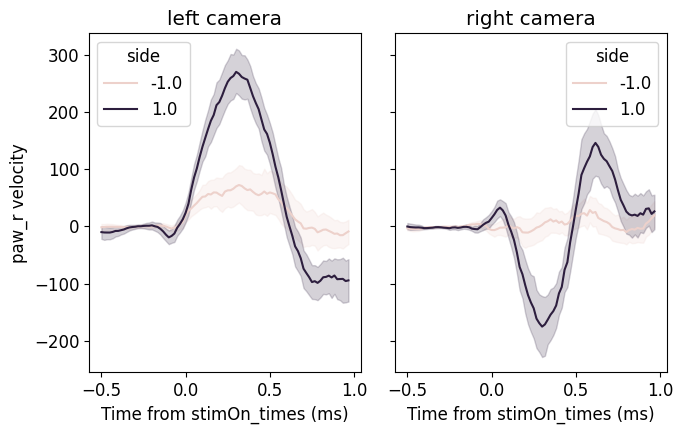

In [37]:
    fig, ax = plt.subplots(nrows=1, ncols=len(cameras), sharex=False, sharey=True, figsize=[7, 4.5])

    plt.rc('font', size=12)

    for c, camera in enumerate(cameras):
        
        this_data = data[c]
        this_data['smooth_value'] = this_data['value'].rolling(3, min_periods=1).mean()
        this_data = this_data.loc[this_data['choice'].isin([1., -1.])]
        this_data['side'] = -(this_data['feedback'] * this_data['choice'])
        
        sns.lineplot(x='variable', y='value', hue='side', data=this_data, ax = ax[c])

        ax[c].set_xlabel(' ')
        ax[c].set_xlabel('Time from ' + event + ' (ms)')
        
        if keypoint == pupil_center:
            body_part = 'pupil'
        elif keypoint == get_pupil_diameter:
            body_part = 'pupil diameter'
        else:
            body_part = keypoint
            
        ax[c].set_ylabel(str(keypoint) + ' velocity')
        ax[c].set_ylabel(str(keypoint) + ' velocity')

        ax[c].set_title(str(camera) + ' camera')
        ax[c].set_title(str(camera) + ' camera')

    plt.tight_layout()

    # Save the plot as a PNG file
    #plt.savefig(str(save_path + session + '.png'), format='png')

    # Display the plot
    plt.show()

### Loop through good sessions and plot

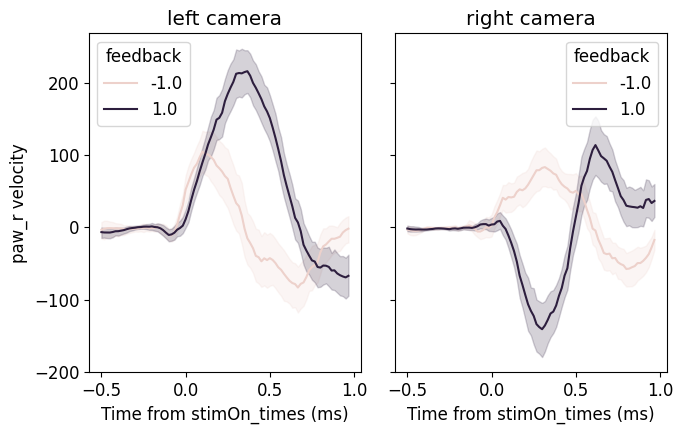

In [36]:
t_init = 0.5
t_end = 1
event = 'stimOn_times'
save_path = '/home/ines/repositories/representation_learning_variability/Exported figures/'
keypoint = 'paw_r'
ephys = True

for s, session in enumerate(list(pass_qc)[0:1]):
    
    session = 'd23a44ef-1402-4ed7-97f5-47e9a7a504d9'
    session_trials = one.load_object(session, obj='trials', namespace='ibl')
    session_trials = session_trials.to_df() 
    
    # Get speed for pupil center
    speeds = keypoint_speed(session, ephys, keypoint, split=True)

    # Downsample right camera
    to_shorten = ['right']
    reference = 'left'
    speeds = downsample(speeds, to_shorten, reference)
    
    # Align data for PSTH
    right_camera = timeseries_PSTH(speeds['right'][0][1:], speeds['right'][1], session_trials, event, t_init, t_end, subtract_baseline=False)
    left_camera = timeseries_PSTH(speeds['left'][0][1:], speeds['left'][1], session_trials, event, t_init, t_end, subtract_baseline=False)

    # Plot and save
    cameras = ['left', 'right']
    data = [left_camera, right_camera]

    fig, ax = plt.subplots(nrows=1, ncols=len(cameras), sharex=False, sharey=True, figsize=[7, 4.5])

    plt.rc('font', size=12)

    for c, camera in enumerate(cameras):
        
        this_data = data[c]
        this_data['smooth_value'] = this_data['value'].rolling(3, min_periods=1).mean()
        this_data = this_data.loc[this_data['choice'].isin([1., -1.])]

        sns.lineplot(x='variable', y='value', hue='feedback', data=this_data, ax = ax[c])

        ax[c].set_xlabel(' ')
        ax[c].set_xlabel('Time from ' + event + ' (ms)')
        
        if keypoint == pupil_center:
            body_part = 'pupil'
        elif keypoint == get_pupil_diameter:
            body_part = 'pupil diameter'
        else:
            body_part = keypoint
            
        ax[c].set_ylabel(str(keypoint) + ' velocity')
        ax[c].set_ylabel(str(keypoint) + ' velocity')

        ax[c].set_title(str(camera) + ' camera')
        ax[c].set_title(str(camera) + ' camera')

    plt.tight_layout()

    # Save the plot as a PNG file
    #plt.savefig(str(save_path + session + '.png'), format='png')

    # Display the plot
    plt.show()


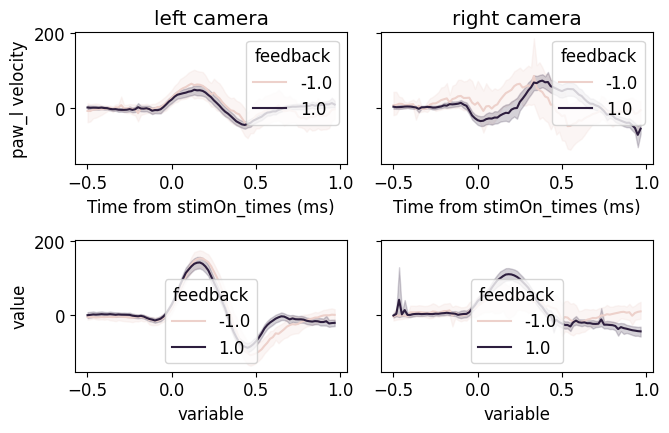

In [31]:
t_init = 0.5
t_end = 1
event = 'stimOn_times'
save_path = '/home/ines/repositories/representation_learning_variability/Exported figures/'
keypoint = 'paw_l'
ephys = True

for s, session in enumerate(list(pass_qc)[0:1]):
    
    session_trials = one.load_object(session, obj='trials', namespace='ibl')
    session_trials = session_trials.to_df() 
    
    # Get speed for pupil center
    speeds = keypoint_speed(session, ephys, keypoint, split=True)
    
    # Downsample right camera
    to_shorten = ['right']
    reference = 'left'
    speeds = downsample(speeds, to_shorten, reference)
    
    # Align data for PSTH
    right_camera = timeseries_PSTH(speeds['right'][0][1:], speeds['right'][1], session_trials, event, t_init, t_end, subtract_baseline=False)
    left_camera = timeseries_PSTH(speeds['left'][0][1:], speeds['left'][1], session_trials, event, t_init, t_end, subtract_baseline=False)

    # Plot and save
    cameras = ['left', 'right']
    data = [left_camera, right_camera]

    fig, ax = plt.subplots(nrows=2, ncols=len(cameras), sharex=False, sharey=True, figsize=[7, 4.5])

    plt.rc('font', size=12)

    for c, camera in enumerate(cameras):
        
        this_data = data[c]
        this_data['smooth_value'] = this_data['value'].rolling(3, min_periods=1).mean()
        left_choice_data = this_data.loc[this_data['choice'].isin([-1.])]
        right_choice_data = this_data.loc[this_data['choice'].isin([1.])]

        sns.lineplot(x='variable', y='value', hue='feedback', data=left_choice_data, ax = ax[0, c])
        sns.lineplot(x='variable', y='value', hue='feedback', data=right_choice_data, ax = ax[1, c])

        ax[0, c].set_xlabel(' ')
        ax[0, c].set_xlabel('Time from ' + event + ' (ms)')
        
        if keypoint == pupil_center:
            body_part = 'pupil'
        elif keypoint == get_pupil_diameter:
            body_part = 'pupil diameter'
        else:
            body_part = keypoint
            
        ax[0, c].set_ylabel(str(keypoint) + ' velocity')
        ax[0, c].set_ylabel(str(keypoint) + ' velocity')

        ax[0, c].set_title(str(camera) + ' camera')
        ax[0, c].set_title(str(camera) + ' camera')

    plt.tight_layout()

    # Save the plot as a PNG file
    #plt.savefig(str(save_path + session + '.png'), format='png')

    # Display the plot
    plt.show()